In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from src.utils import load_from_files
from src.resnet50.preprocess import preprocess


In [9]:
max_jets = 500
file_path = "./data/test-public-small.h5"

In [11]:
data, labels, _, _, _ = load_from_files(
    [file_path], max_jets=max_jets, use_train_weights=False
)

images = preprocess(data)

In [3]:
data.shape

(500, 200, 7)

In [13]:
images.shape

(500, 64, 64)

In [14]:
def plot_jets(images, jet=None, eta_range=(-2, 2), phi_range=(-2, 2)):
    if jet is None:
        image = images.mean(axis=0)
    else:
        image = images[jet]
    
    vmin = image[image > 0].min() if np.any(image > 0) else 1e-6
    
    plt.imshow(
        image.T,
        origin='lower',
        extent=[*eta_range, *phi_range],
        aspect='auto',
        cmap='inferno',
        norm=LogNorm(vmin=vmin, vmax=image.max())
    )
    plt.xlabel(r'Pre-processed $\eta$')
    plt.ylabel(r'Pre-processed $\phi$')
    plt.colorbar(label=r'Normalized $\rho_T$')
    plt.show()


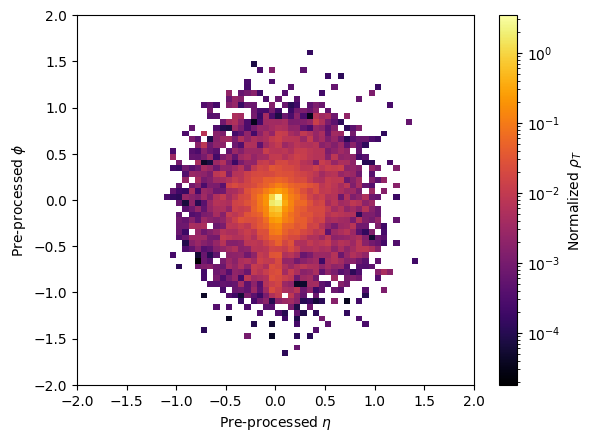

In [15]:
plot_jets(images)